<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>


# **단변량 분석 ② - 범주형**

- 범주형 변수는 정해진 몇 개의 값이 여럿 모여있는 변수입니다.
- 범주형 변수는 범줏값 각각이 몇 개씩 포함되어 있는지, 전체에서 각각이 차지하는 비율은 어떤지가 궁금합니다.
- 즉 범주형 변수안에 포함된 범숫값 각각의 **빈도수**와 **비율**이 분석 대상이 됩니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/var_02.png' width=600 align='left'/>

## **1. 환경준비**

- 사용할 라이브러리와 분석 대상 데이터를 불러옵니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (6, 4)

In [2]:
# Diabetes 데이터
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/diabetes2.csv'
diabetes = pd.read_csv(path)
diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,BPStatus,SkinThickness,Insulin,BMI,BMIStatus,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,Normal,35.0,NaN,33.6,Obese,0.627,50.0,1
1,1,85.0,66.0,Normal,29.0,NaN,26.6,Overweight,0.351,31.0,0
2,8,183.0,64.0,Normal,NaN,NaN,23.3,Normal,0.672,32.0,1
3,1,89.0,66.0,Normal,23.0,94.0,28.1,Overweight,0.167,21.0,0
4,0,137.0,40.0,Low,35.0,168.0,43.1,Obese,2.288,33.0,1
5,5,116.0,74.0,Normal,NaN,NaN,25.6,Overweight,0.201,30.0,0
6,3,78.0,50.0,Low,32.0,88.0,31.0,Obese,0.248,26.0,1
7,10,115.0,NaN,NaN,NaN,NaN,35.3,Obese,0.134,29.0,0
8,2,197.0,70.0,Normal,45.0,543.0,30.5,Obese,0.158,53.0,1
9,8,125.0,96.0,High,NaN,NaN,NaN,NaN,0.232,54.0,1


**📋 데이터 정보**

피마 인디언 당뇨 데이터셋은 몇 명의 여성 피마 인디언의 진료 자료와 진단 후 5년 내 당뇨 발병 여부로 구성됨

- Pregnancies: 임신 횟수
- Glucose: 포도당, 피속에 있는 혈당 수치(mg/dL)(정상: 공복 시 70~100)
- BloodPressure: 혈압(mm Hg)
- BPStatus: Low(저혈압), Normal(정상), High(고혈압)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml), 혈당 조절에 중요한 역할
- BMI: 체질량지수(체중(kg)/키(m)^2)
- BMIStatus: Underweight(저체중), Normal(정상), Overweight(과체중), Obese(비만)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 당뇨병 여부(0 또는 1)

**diabetes**

- 당뇨병(糖尿病, diabetes)은 높은 혈당 수치가 오랜 기간 지속되는 대사 질환이다.
- 혈당이 높을 때의 증상으로는 소변이 잦아지고, 갈증과 배고픔이 심해진다.
- 이를 치료하지 않으면 다른 합병증을 유발할 수 있다.
(출처: 위키백과)

## **2. 수치화**

- 범주형 변수는 범주별 빈도수와 비율을 기초 통계량을 통해 확인합니다.
- Pandas의 **value_counts()** 메소드는 범주형 변수에 포함된 범줏값 각각의 개수를 카운트 해 줍니다.
- **normalize=True** 옵션을 지정해 개수가 아닌 비율을 확인할 수 있습니다.

In [3]:
print(diabetes['BMIStatus'].value_counts())
print('-' * 25)
print(diabetes['BMIStatus'].value_counts(normalize=True))

BMIStatus
Obese          472
Overweight     179
Normal         102
Underweight      4
Name: count, dtype: int64
-------------------------
BMIStatus
Obese          0.623514
Overweight     0.236460
Normal         0.134742
Underweight    0.005284
Name: proportion, dtype: float64


**🔍 해석**
    
- 비만(Obese)이 전체에서 62.4%를 차지
- 과체중(Overweight)이 23.6%, 정상(Normal)이 13.5%를 차지
- 저체중(Underweight)은 0.5%로 매우 적은 비율


In [4]:
print(diabetes['BPStatus'].value_counts())
print('-' * 25)
print(diabetes['BPStatus'].value_counts(normalize=True))

BPStatus
Normal    442
High      205
Low        86
Name: count, dtype: int64
-------------------------
BPStatus
Normal    0.603001
High      0.279673
Low       0.117326
Name: proportion, dtype: float64


In [5]:
print(diabetes['Outcome'].value_counts())
print('-' * 25)
print(diabetes['Outcome'].value_counts(normalize=True))

Outcome
0    500
1    268
Name: count, dtype: int64
-------------------------
Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64


## **3. 시각화**

- 범주형 변수는 Bar Plot과 Pie Chart를 사용해 시각화 할 수 있습니다.
- 기초 통계량보다 좀더 쉽게 데이터를 이해할 수 있습니다.

### **3.1. Bar Plot**

- 범주 이름과 값이 필요하므로 집계 작업이 선행되어야 합니다.
- 판다스의 **value_counts()** 를 사용하여 집계합니다.
    - 집계 결과의 index: 범줏값 이름
    - 집계 결과의 values: 값
- 집계 결과를 **Matplotlib**의 **bar()** 함수로 시각화합니다.

- diabetes 데이터프레임의 BMIStatus 변수에 포함된 범줏값 각각의 개수를 집계합니다.

In [6]:
temp = diabetes['BMIStatus'].value_counts()
print(temp.index)
print(temp.values)

Index(['Obese', 'Overweight', 'Normal', 'Underweight'], dtype='object', name='BMIStatus')
[472 179 102   4]


- 위 집계 결과를 bar() 함수로 시각화합니다.
- x축이 범줏값 이름, y축이 비교할 값입니다.

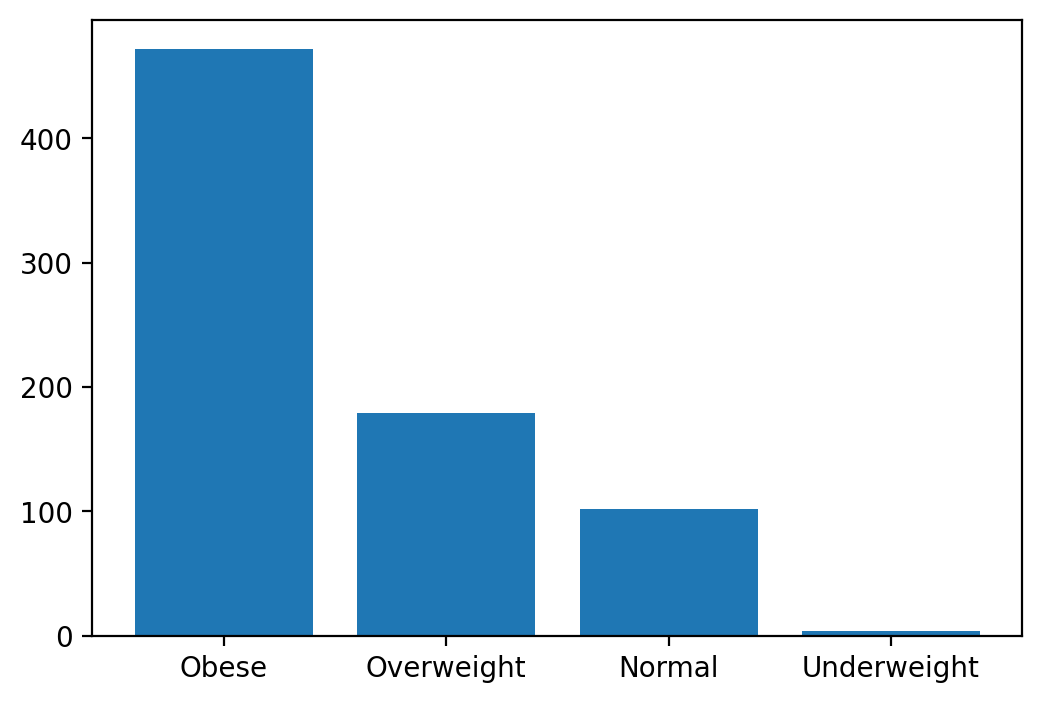

In [7]:
temp = diabetes['BMIStatus'].value_counts()

plt.bar(x=temp.index.astype(str), height=temp.values)
plt.show()

- **Seaborn**의 **countplot()** 함수를 사용하면 집계 과정 없이도 Bar Plot을 그릴 수 있습니다.

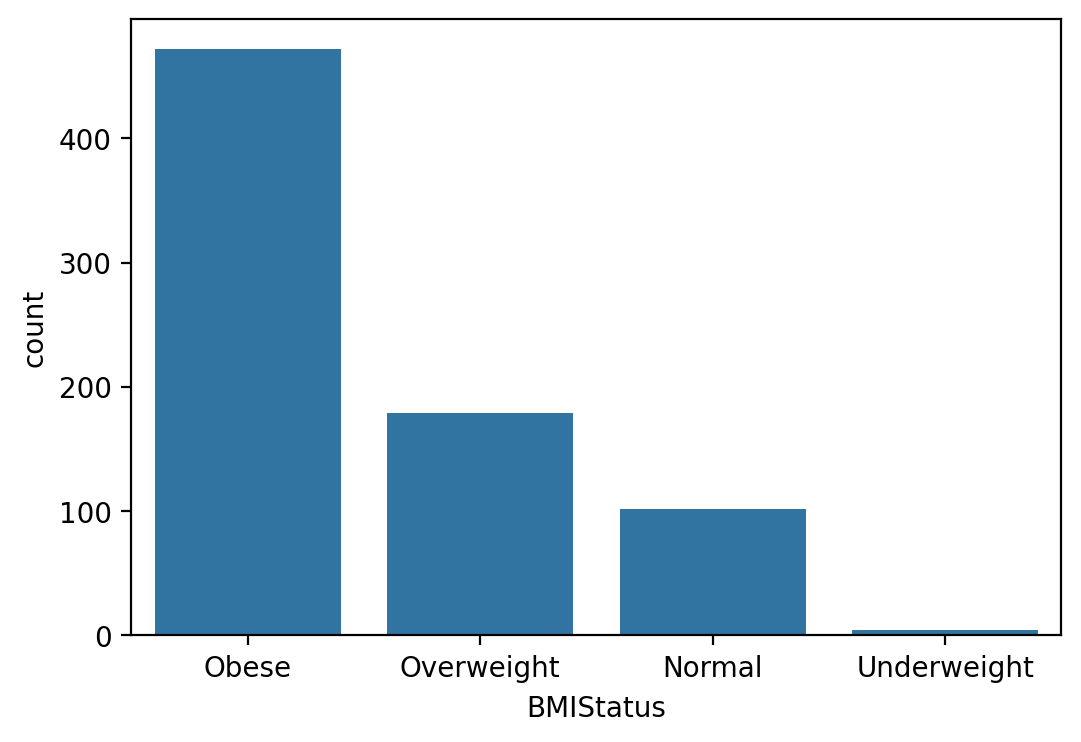

In [8]:
sns.countplot(x='BMIStatus', data=diabetes)
plt.show()

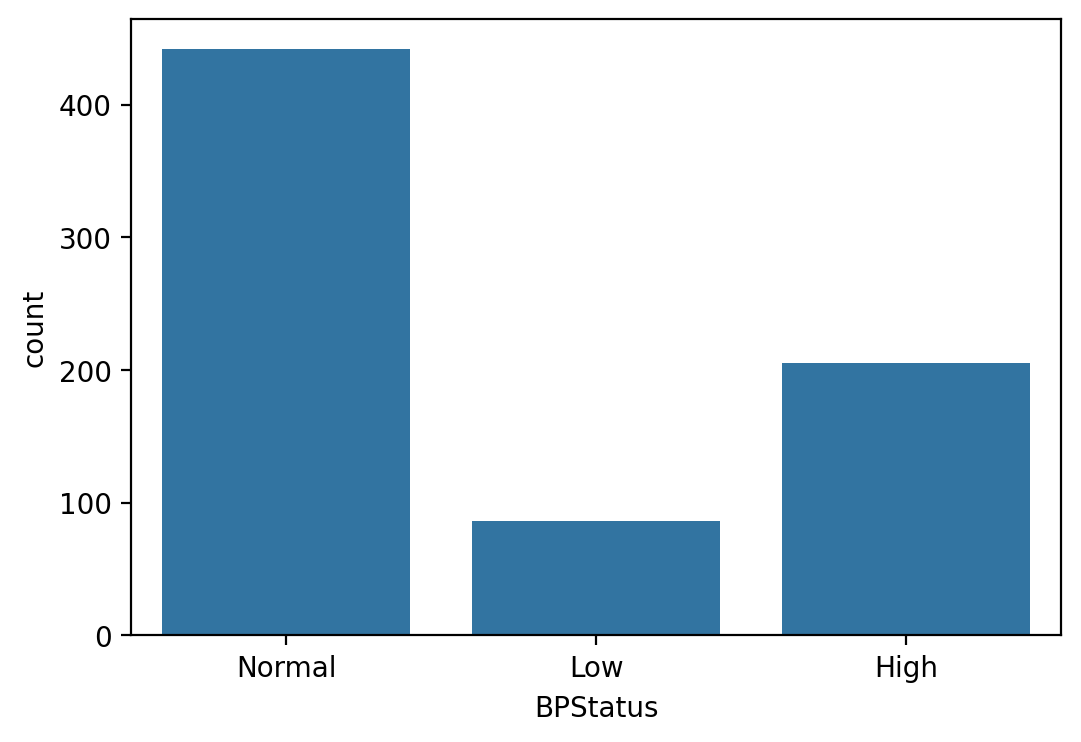

In [9]:
sns.countplot(x='BPStatus', data=diabetes)
plt.show()

### **3.2. Pie Chart**

- 범주별 값의 빈도수가 아닌 비율을 비교할 때는 Pie Chart를 사용합니다.
- Pie Chart 역시 집계를 먼저 해야 합니다.

In [10]:
temp = diabetes['BMIStatus'].value_counts()
print(temp.index)
print(temp.values)

Index(['Obese', 'Overweight', 'Normal', 'Underweight'], dtype='object', name='BMIStatus')
[472 179 102   4]


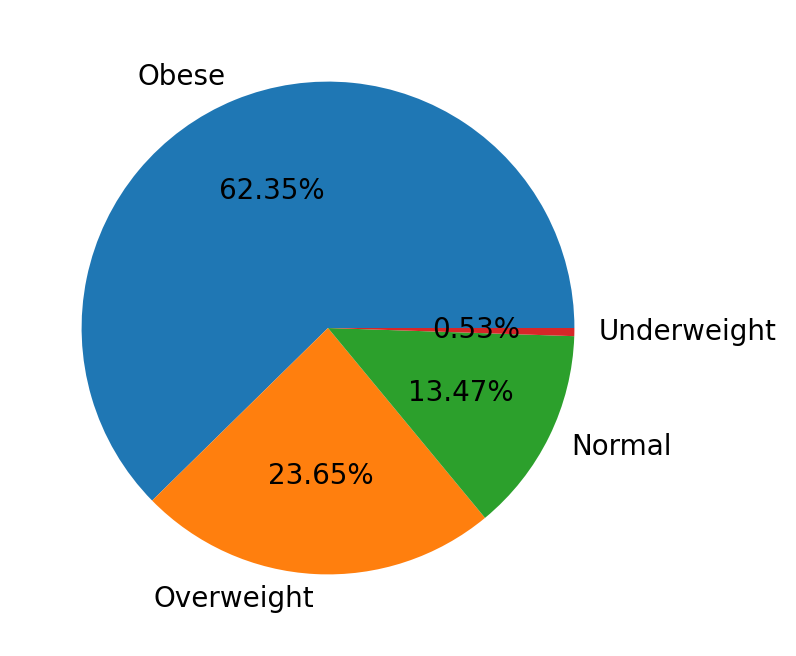

In [11]:
temp = diabetes['BMIStatus'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.2f%%')
plt.show()

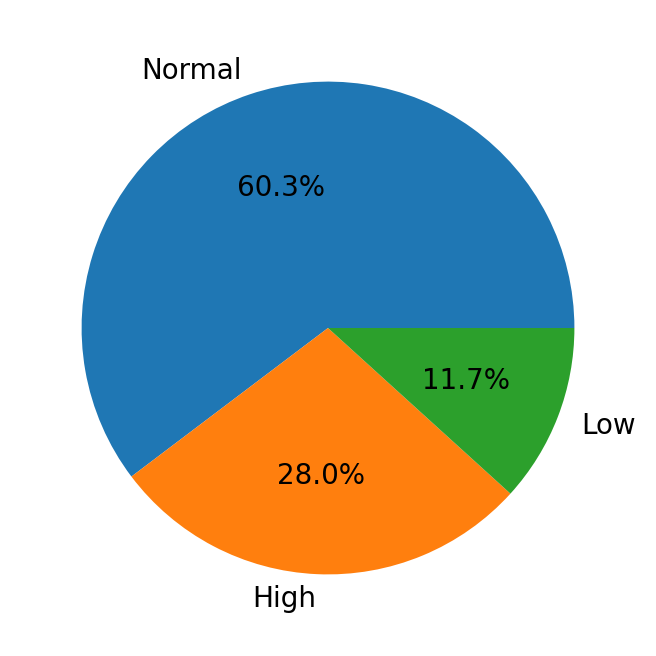

In [12]:
temp = diabetes['BPStatus'].value_counts()

plt.pie(x=temp.values, labels=temp.index, autopct='%.1f%%')
plt.show()

- 다음 두 옵션을 사용해 파이의 각도와 방향을 조절해 봅니다.
    
    - startangle=90: 90도 부터 시작
    - counterclock=False: 시계 방향으로

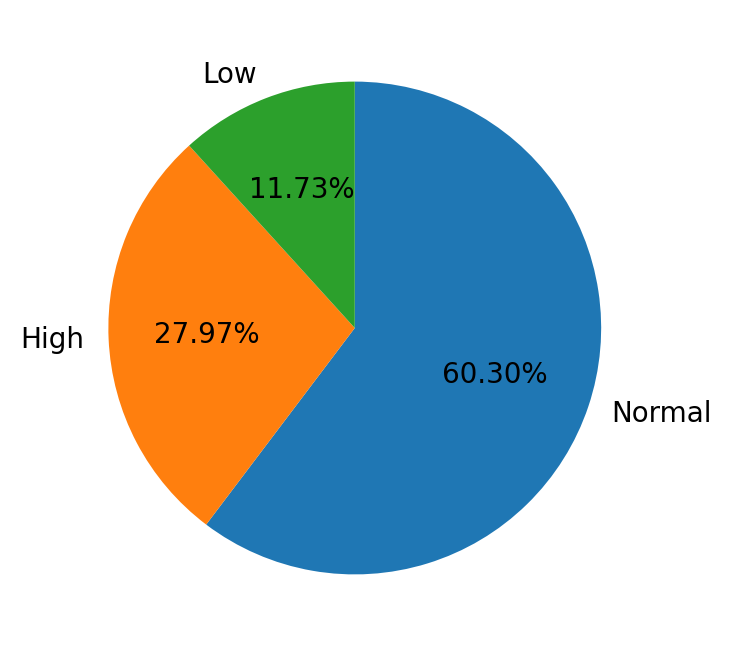

In [13]:
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False)
plt.show()

- 다음 두 옵션을 사용해 파이 간격과 그림자를 조절해 봅니다.

    - explode=[0.05, 0.05, 0.05]: 중심으로 부터 1, 2, 3을 얼마만큼 띄울지
    - shadow=True: 그림자 추가



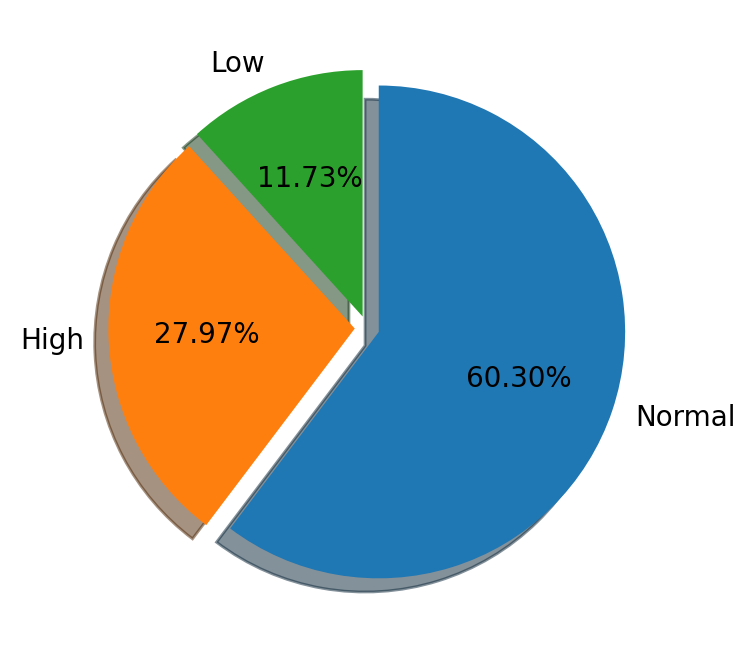

In [14]:
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False,
        explode=[0.05, 0.05, 0.05],
        shadow=True)
plt.show()

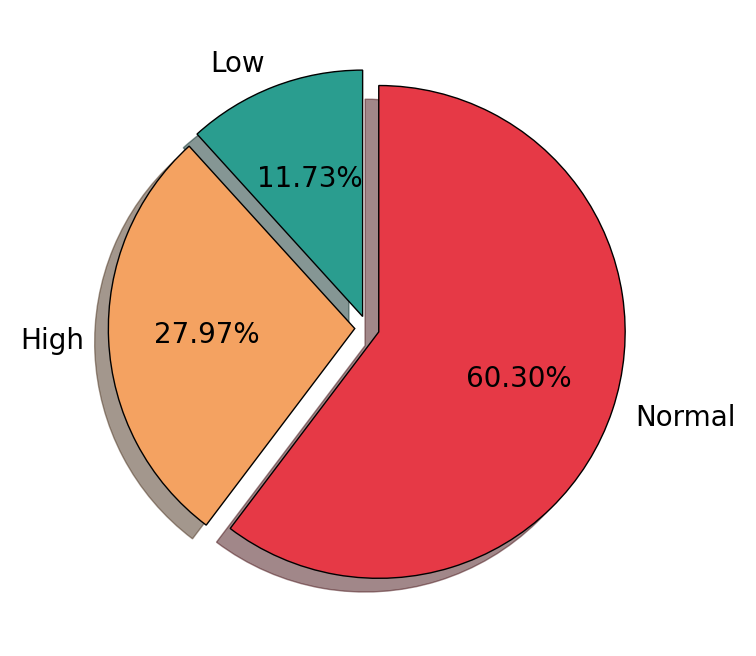

In [15]:
colors = ["#E63946", "#F4A261", "#2A9D8F"]
plt.pie(x=temp.values,
        labels=temp.index,
        autopct='%.2f%%',
        startangle=90,
        counterclock=False,
        explode=[0.05, 0.05, 0.05],
        shadow=True,
        wedgeprops={'edgecolor': 'black', 'linewidth': 0.5},
        colors= colors)
plt.show()